## 1. Folder Intro
---

```zsh
hexo init blog && cd blog/

tree -L 1
.
├── _config.landscape.yml
├── _config.yml
├── db.json
├── node_modules
├── package-lock.json
├── package.json
├── public
├── scaffolds
├── source
└── themes

# 只列出一部分文件结构
tree -L 2
.
├── _config.yml
├── public
│   ├── 2023
│   ├── archives
│   ├── css
│   ├── images
│   ├── index.html
│   └── js
├── scaffolds
│   ├── draft.md
│   ├── page.md
│   └── post.md
├── source
│   └── _posts
└── themes
    └── next
```

### 1.1 public

可以看到, `public`文件夹就是我们的网页内容, 也就是`hexo generate`生成的静态文件, 我们`hexo deploy`到网站上的东西就是这个文件下的东西, 如下图:


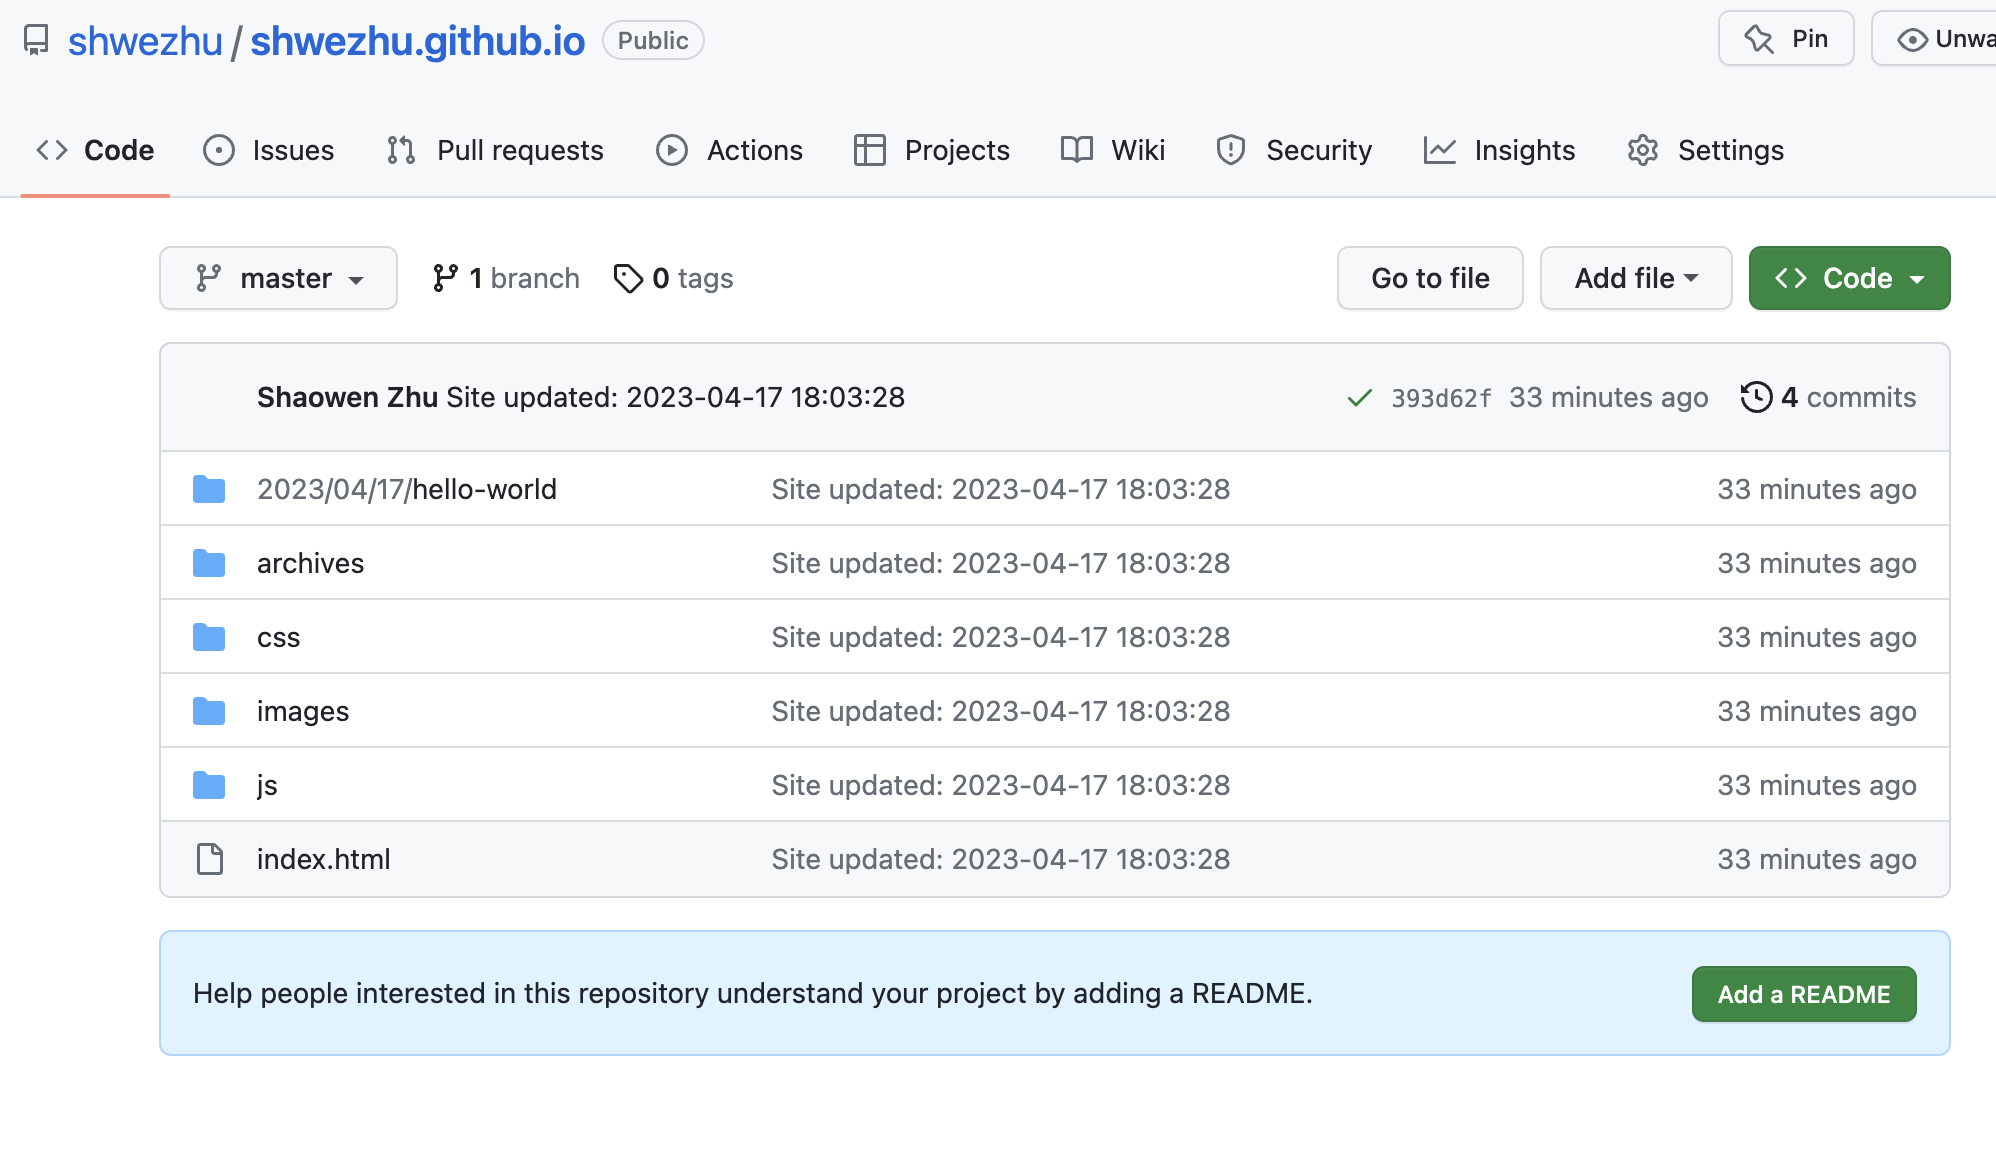

### 1.2. _config.yml

全局配置文件, 我们的deploy, 选择主题都是在这配置的, 但是如果配置具体主题细节, 我们需要进到`themes`文件夹下, 再进入相关的主题文件中, 如next, 然后`themes/next/`下也有个`_config.yml`, 我们需要在这配置. 

### 1.3. scaffolds

`scaffolds`是“脚手架、骨架”的意思，当你新建一篇文章（`hexo new 'title'`）的时候，hexo是根据这个目录下的文件进行构建的。貌似是个模板一样的东西, 


### 1.4. source

`source/`目录很重要，新建的文章都是在保存在这个目录下的，有两个子目录：`_drafts`，`_posts`。需要新建的博文都放在`_posts`目录下。`_posts`目录下是一个个markdown文件。你应该可以看到一个`hello-world.md`的文件，文章就在这个文件中编辑。

`_posts/`目录下的md文件，会被编译成html文件，放到`public/`



## 2. 创建博客
----

最初scaffolds和source内容如下, 
```zsh
├── scaffolds
│   ├── draft.md
│   ├── page.md
│   └── post.md
├── source
│   └── _posts
│       └── hello-world.md
```

基础命令如下:

```
hexo new <layout> title
```

其中parameter `layout`是上面我们介绍的`scaffolds/`下的模板名字, 如上面的输出最初`scaffolds/`下有`draft.md`, `page.md`, `post.md`, 那么`layout`的的值可以为`post`, `draft`, `page`, hexo会根据不同模板为我们在`source/_post/`下初始化不同内容的`md`文件, 以便于我们省事, 不用写一些必要信息(什么创建日期, 文章title等), 

e.g., 

```zsh
hexo new post "New Post with Hexo"

cat source/_posts/New-Post-with-Hexo.md 
---
title: New Post with Hexo
date: 2023-04-17 19:10:24
tags:
---
```


## 3. 文章内容编辑
---

### 3.1. 文章摘要

设置文章摘要，我们只需在想显示为摘要的内容之后添 `<!-- more -->` 即可。像下面这样：

```
---
title: hello hexo markdown
date: 2016-11-16 18:11:25
tags:
- hello
- hexo
- markdown
---

我是短小精悍的文章摘要(๑•̀ㅂ•́) ✧

<!-- more -->

紧接着文章摘要的正文内容
```

这样，<!-- more --> 之前、文档配置参数之后中的内容便会被渲染为站点中的文章摘要。

### 3.2. 资源引用

写个客有时候会想添加个图片或者其他形式的资源等等。有以下两种方式进行解决：

- 使用绝对路径引用资源，在 Web 世界中就是资源的 URL
- 使用相对路径引用资源

对于使用相对路径引用资源的，我们可以使用 Hexo 提供的资源文件夹功能。

#### 3.2.1. 修改配置文件
使用文本编辑器打开站点根目录下的 `_ config.yml` 文件，将 `post_asset_folder` 值设置为 `true`

修改之后会开启 Hexo 的文章资源文件管理功能。Hexo将会在我们每一次通过 `hexo new <title>` 命令创建新文章时自动创建一个同名文件夹，于是我们便可以将文章所引用的相关资源放到这个同名文件夹下，然后通过相对路径引用。

#### 3.2.2. 安装hexo-asset-image插件

```
npm install https://github.com/CodeFalling/hexo-asset-image --save
```

安装的packages在`blog/node_modules/`下面, 备份的时候这个文件夹不用备份, 我们只用备份`package.json`文件就行, 

#### 3.2.3. **e.g.,** 

```zsh
hexo new post article-1
INFO  Validating config
INFO  Created: ~/Downloads/blog/source/_posts/article-1.md

ls source/_posts/      
article-1      article-1.md   hello-world.md

# 在同名文件夹article-1下放要插入的图片
ls source/_posts/article-1 
violet.png
```

`md`文件的内容:

```c
---
title: article-1
date: 2023-04-17 19:25:31
tags:
---

Hi, I'm digest...

<!-- more -->

这里是正文,,,,


!['name of picture'](article-1/violet.png)
```

测试

```zsh
# hexo clean
hexo g
hexo s
# hexo d
```

### 3.3. 文章分类

```
---
title: Deploy Blogs with Hexo
date: 2023-04-17 19:25:31
categories: 
- [hexo]
- [build website]
---
```

## 写在最后

每次发布的时候想预览可以使用`hexo server`指令, 因为你直接deploy到网站的话, 可能要等几分钟才能生效, 一般发布文章或预览, 命令如下“

```
hexo new post "article name"

# hexo clean

hexo g

hexo s

# hexo d
```